In [1]:
# 모듈 로드
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import tensorflow as tf

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, Input

## 데이터 로드 및 전처리


In [2]:
(x_train, y_train),(x_test,y_test) = load_data()

# 신규 축(채널) 추가 (색상 채널 흑백은 0, RGB는 3)
x_train, x_test = x_train[..., np.newaxis], x_test[..., np.newaxis]
# 정규화
x_train, x_test = x_train/255.0, x_test/255.0

x_train.shape, x_test.shape, y_train.shape, y_test.shape

4431872/4422102 [==============================] - 0s 0us/step


((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

In [3]:
class_names=['T-shirt/top','Trouser','Pullover',
             'Dress','Coat','Sandal','Shirt',
             'Sneaker','Bag','Ankel boot']

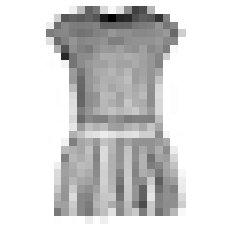

In [4]:
plt.axis('off')
plt.imshow(x_train[3,:,:,0])
plt.show();

## 모델 구성 및 학습

In [5]:
def cnn():
    model=Sequential()
    
    # CNN 레이어 구성
    input = Input(shape=(28,28,1))
    output = Conv2D(filters=32, kernel_size=(3,3))(input)
    output = Conv2D(filters=64, kernel_size=(3,3))(output)
    output = Conv2D(filters=64, kernel_size=(3,3))(output)
    output = Flatten()(output)
    output = Dense(128, activation='relu')(output)
    output = Dense(64, activation='relu')(output)
    output = Dense(10, activation='softmax')(output)
    
    model=Model(inputs=[input], outputs=output)
    
    # 컴파일
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

model_1 = cnn()
model_1.summary()

2022-09-05 23:02:30.010126: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-05 23:02:30.163154: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-05 23:02:30.163902: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-05 23:02:30.166056: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3965056   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256  

In [6]:
hist_1 = model_1.fit(x_train, y_train,
                     epochs=25,
                     batch_size=128,
                     validation_split=0.3)

2022-09-05 23:02:33.578213: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25


2022-09-05 23:02:35.139726: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


329/329 [==============================] - 11s 10ms/step - loss: 0.5276 - accuracy: 0.8117 - val_loss: 0.4021 - val_accuracy: 0.8559
Epoch 2/25
329/329 [==============================] - 3s 10ms/step - loss: 0.3590 - accuracy: 0.8671 - val_loss: 0.3910 - val_accuracy: 0.8591
Epoch 3/25
329/329 [==============================] - 3s 9ms/step - loss: 0.3022 - accuracy: 0.8885 - val_loss: 0.3599 - val_accuracy: 0.8713
Epoch 4/25
329/329 [==============================] - 3s 9ms/step - loss: 0.2506 - accuracy: 0.9065 - val_loss: 0.3828 - val_accuracy: 0.8694
Epoch 5/25
329/329 [==============================] - 3s 9ms/step - loss: 0.2177 - accuracy: 0.9201 - val_loss: 0.3925 - val_accuracy: 0.8729
Epoch 6/25
329/329 [==============================] - 3s 9ms/step - loss: 0.1892 - accuracy: 0.9296 - val_loss: 0.4169 - val_accuracy: 0.8698
Epoch 7/25
329/329 [==============================] - 3s 9ms/step - loss: 0.1667 - accuracy: 0.9388 - val_loss: 0.4462 - val_accuracy: 0.8655
Epoch 8/25
329

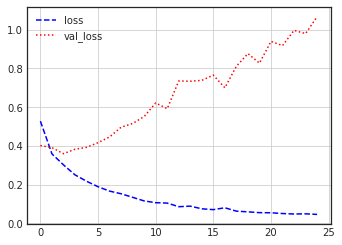

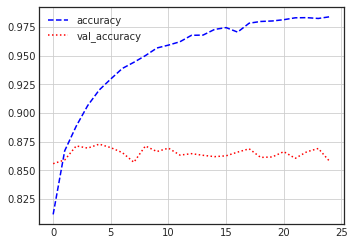

In [7]:
hist_1.history.keys()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist_1.history['loss'], 'b--', label='loss')
plt.plot(hist_1.history['val_loss'], 'r:', label='val_loss')
plt.grid()
plt.legend()

plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot(hist_1.history['accuracy'], 'b--', label='accuracy')
plt.plot(hist_1.history['val_accuracy'], 'r:', label='val_accuracy')
plt.grid()
plt.legend()

plt.show();

# 과적합

In [8]:
# 모델 평가
model_1.evaluate(x_test,y_test)

# 과적합으로 훈련때보다 정확도 낮음

313/313 [==============================] - 1s 2ms/step - loss: 1.1375 - accuracy: 0.8506


[1.1375060081481934, 0.850600004196167]

## 모델 구성 및 학습
### 과대적합 방지
#### Dropout 레이어 구성

In [9]:
def cnn_2():
    model=Sequential()
    
    # CNN 레이어 구성
    input = Input(shape=(28,28,1))
    output = Conv2D(filters=32, kernel_size=(3,3))(input)
    output = MaxPool2D(strides=(2,2))(output)
    output = Conv2D(filters=64, kernel_size=(3,3))(output)
    output = Dropout(0.4)(output)
    output = MaxPool2D(strides=(2,2))(output)
    output = Conv2D(filters=64, kernel_size=(3,3))(output)
    output = Dropout(0.4)(output)
    output = MaxPool2D(strides=(2,2))(output)
    output = Flatten()(output)
    output = Dense(128, activation='relu')(output)
    output = Dropout(0.5)(output)
    output = Dense(64, activation='relu')(output)
    output = Dropout(0.5)(output)
    output = Dense(10, activation='softmax')(output)
    
    model=Model(inputs=[input], outputs=output)
    
    # 컴파일
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

model_2 = cnn_2()
model_2.summary()

# Parameter 수 감소 : MaxPooling

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          3692

In [10]:
hist_2 = model_2.fit(x_train, y_train,
                     epochs=40,
                     batch_size=128,
                     validation_split=0.3)

Epoch 1/40
329/329 [==============================] - 2s 6ms/step - loss: 1.1424 - accuracy: 0.5764 - val_loss: 0.7163 - val_accuracy: 0.7306
Epoch 2/40
329/329 [==============================] - 2s 5ms/step - loss: 0.7300 - accuracy: 0.7347 - val_loss: 0.6059 - val_accuracy: 0.7823
Epoch 3/40
329/329 [==============================] - 2s 5ms/step - loss: 0.6511 - accuracy: 0.7661 - val_loss: 0.5778 - val_accuracy: 0.7863
Epoch 4/40
329/329 [==============================] - 2s 5ms/step - loss: 0.6084 - accuracy: 0.7842 - val_loss: 0.5412 - val_accuracy: 0.7984
Epoch 5/40
329/329 [==============================] - 2s 5ms/step - loss: 0.5751 - accuracy: 0.7965 - val_loss: 0.5710 - val_accuracy: 0.7785
Epoch 6/40
329/329 [==============================] - 2s 5ms/step - loss: 0.5501 - accuracy: 0.8070 - val_loss: 0.4970 - val_accuracy: 0.8208
Epoch 7/40
329/329 [==============================] - 2s 5ms/step - loss: 0.5232 - accuracy: 0.8149 - val_loss: 0.4622 - val_accuracy: 0.8334
Epoch 

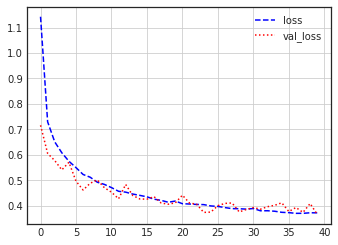

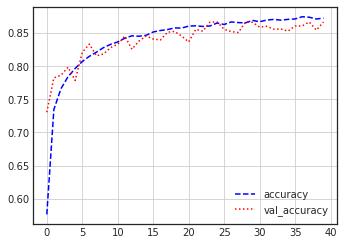

In [11]:
hist_2.history.keys()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist_2.history['loss'], 'b--', label='loss')
plt.plot(hist_2.history['val_loss'], 'r:', label='val_loss')
plt.grid()
plt.legend()

plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot(hist_2.history['accuracy'], 'b--', label='accuracy')
plt.plot(hist_2.history['val_accuracy'], 'r:', label='val_accuracy')
plt.grid()
plt.legend()

plt.show();

In [12]:
# 모델 평가
model_2.evaluate(x_test,y_test)

# 성능 향상은 없지만 과대적합 방지

313/313 [==============================] - 1s 2ms/step - loss: 0.3761 - accuracy: 0.8637


[0.37609976530075073, 0.8636999726295471]

## 모델 성능 향상 - 레이어 추가

In [13]:
from tensorflow.keras.layers import BatchNormalization

In [14]:
def cnn_final():
    model=Sequential()
    
    # CNN 레이어 구성
    input = Input(shape=(28,28,1))
    output = Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(input)
    output = BatchNormalization()(output)
    output = Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='valid')(output)
    output = Dropout(0.5)(output)
    output = MaxPool2D(strides=(2,2))(output)
    
    output = Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(output)
    output = BatchNormalization()(output)
    output = Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='valid')(output)
    output = Dropout(0.5)(output)
    output = MaxPool2D(strides=(2,2))(output)
    
    output = Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same')(output)
    output = BatchNormalization()(output)
    output = Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='valid')(output)
    output = Dropout(0.5)(output)
    output = MaxPool2D(strides=(2,2))(output)
    
    output = Flatten()(output)
    
    output = Dense(512, activation='relu')(output)
    output = Dropout(0.5)(output)
    
    output = Dense(256, activation='relu')(output)
    output = Dropout(0.5)(output)
    
    output = Dense(10, activation='softmax')(output)
    
    model=Model(inputs=[input], outputs=output)
    
    # 컴파일
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

model_final = cnn_final()
model_final.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
dropout_4 (Dropout)          (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 128)       7385

In [15]:
hist_fin = model_final.fit(x_train, y_train,
                           epochs=25,
                           validation_split=0.3,
                           batch_size=128)

Epoch 1/25
329/329 [==============================] - 6s 17ms/step - loss: 0.7831 - accuracy: 0.7177 - val_loss: 2.2479 - val_accuracy: 0.1583
Epoch 2/25
329/329 [==============================] - 5s 15ms/step - loss: 0.4502 - accuracy: 0.8397 - val_loss: 1.5386 - val_accuracy: 0.4547
Epoch 3/25
329/329 [==============================] - 5s 16ms/step - loss: 0.3778 - accuracy: 0.8676 - val_loss: 0.9323 - val_accuracy: 0.7240
Epoch 4/25
329/329 [==============================] - 5s 15ms/step - loss: 0.3436 - accuracy: 0.8800 - val_loss: 0.6850 - val_accuracy: 0.7481
Epoch 5/25
329/329 [==============================] - 5s 15ms/step - loss: 0.3128 - accuracy: 0.8919 - val_loss: 0.7577 - val_accuracy: 0.7867
Epoch 6/25
329/329 [==============================] - 5s 15ms/step - loss: 0.2925 - accuracy: 0.8981 - val_loss: 0.6291 - val_accuracy: 0.8416
Epoch 7/25
329/329 [==============================] - 5s 15ms/step - loss: 0.2787 - accuracy: 0.9025 - val_loss: 0.5585 - val_accuracy: 0.8329

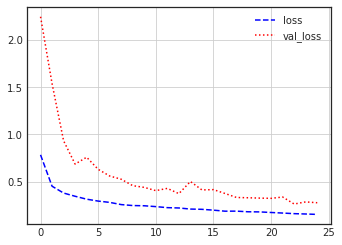

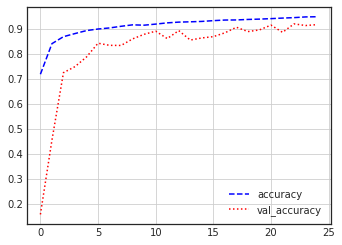

In [16]:
hist_fin.history.keys()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist_fin.history['loss'], 'b--', label='loss')
plt.plot(hist_fin.history['val_loss'], 'r:', label='val_loss')
plt.grid()
plt.legend()

plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot(hist_fin.history['accuracy'], 'b--', label='accuracy')
plt.plot(hist_fin.history['val_accuracy'], 'r:', label='val_accuracy')
plt.grid()
plt.legend()

plt.show();

In [17]:
model_final.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2775 - accuracy: 0.9114


[0.2775228023529053, 0.9114000201225281]

## 모델 성능 향상 - 이미지 보강

In [18]:
im_gen = ImageDataGenerator(
rotation_range=10,
zoom_range=0.2,
shear_range=0.6,
width_shift_range=0.1,
height_shift_range=0.1,
horizontal_flip=True,
vertical_flip=False)

augment_size=200

# 이미지 보강 이전 shape
x_train.shape, x_train[0].shape

((60000, 28, 28, 1), (28, 28, 1))

In [19]:
x_aug = im_gen.flow(np.tile(x_train[0].reshape(28*28*1), augment_size).reshape(-1,28,28,1),
                    np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

# x_train[0].reshape(28*28*1) : 784 = 28*28*1
# np.tile(x_train[0].reshape(28*28*1), augment_size) : 156,800 = 28*28*200
# X = np.tile(x_train[0].reshape(28*28*1), augment_size).reshape(-1, 28, 28, 1) : (200, 28, 28, 1)
# X는 이미지 데이터 Numpy 배열
# Y = np.zeros(augment_size) : 200
# Y는 Numpy 배열로 Y가 None일 경우 X만 return

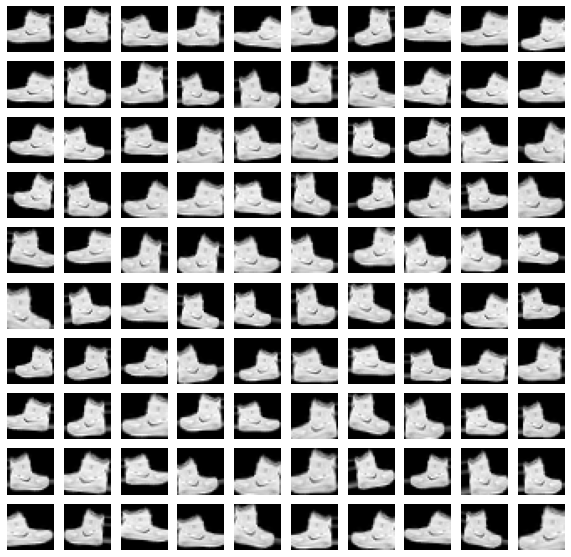

In [20]:
plt.figure(figsize=(10,10))

for i in range(1, 101):
    plt.subplot(10,10,i)
    plt.axis('off')
    plt.imshow(x_aug[i-1].reshape(28,28), cmap='gray');

In [21]:
im_gen = ImageDataGenerator(
rotation_range=15,
zoom_range=0.1,
shear_range=0.6,
width_shift_range=0.15,
height_shift_range=0.1,
horizontal_flip=True,
vertical_flip=False)

augment_size=60000

random_mask = np.random.randint(x_train.shape[0], size = augment_size)

x_augment=x_train[random_mask].copy()
y_augment=y_train[random_mask].copy()

In [22]:
x_augment = im_gen.flow(x_augment, np.zeros(augment_size),
                        batch_size=augment_size, shuffle=False).next()[0]

x_train = np.concatenate((x_train, x_augment))
y_train = np.concatenate((y_train, y_augment))

print(x_train.shape, y_train.shape)

(120000, 28, 28, 1) (120000,)


In [23]:
model_aug = cnn_final()
model_aug.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 26, 26, 64)        36928     
_________________________________________________________________
dropout_9 (Dropout)          (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 128)       7385

In [24]:
hist_aug = model_aug.fit(x_train, y_train,
                         epochs=40,
                         validation_split=0.3,
                         batch_size=128)

Epoch 1/40
657/657 [==============================] - 11s 16ms/step - loss: 0.7134 - accuracy: 0.7426 - val_loss: 1.8873 - val_accuracy: 0.3053
Epoch 2/40
657/657 [==============================] - 10s 15ms/step - loss: 0.4362 - accuracy: 0.8484 - val_loss: 1.0654 - val_accuracy: 0.6911
Epoch 3/40
657/657 [==============================] - 10s 15ms/step - loss: 0.3751 - accuracy: 0.8704 - val_loss: 1.0371 - val_accuracy: 0.6443
Epoch 4/40
657/657 [==============================] - 10s 16ms/step - loss: 0.3404 - accuracy: 0.8807 - val_loss: 1.1022 - val_accuracy: 0.6498
Epoch 5/40
657/657 [==============================] - 10s 15ms/step - loss: 0.3208 - accuracy: 0.8881 - val_loss: 0.8845 - val_accuracy: 0.6956
Epoch 6/40
657/657 [==============================] - 10s 15ms/step - loss: 0.3047 - accuracy: 0.8947 - val_loss: 0.8150 - val_accuracy: 0.7595
Epoch 7/40
657/657 [==============================] - 10s 16ms/step - loss: 0.2894 - accuracy: 0.8987 - val_loss: 0.7208 - val_accuracy:

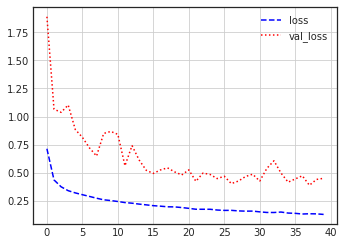

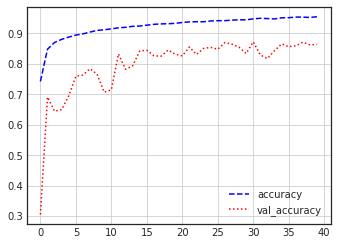

In [25]:
hist_aug.history.keys()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist_aug.history['loss'], 'b--', label='loss')
plt.plot(hist_aug.history['val_loss'], 'r:', label='val_loss')
plt.grid()
plt.legend()

plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot(hist_aug.history['accuracy'], 'b--', label='accuracy')
plt.plot(hist_aug.history['val_accuracy'], 'r:', label='val_accuracy')
plt.grid()
plt.legend()

plt.show();

In [26]:
model_aug.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2734 - accuracy: 0.9160


[0.27343231439590454, 0.9160000085830688]